In [39]:
import pandas as pd
import numpy as np
from scipy.stats import norm

from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [16]:
df_tafel = pd.read_csv("DAV2008T.csv", delimiter = ";")
df_tafel = df_tafel.set_index("Alter")
df_tafel

,A,E,C,B,F,D,G,M,J,H,N,K,I,O,L
Alter,,,,,,,,,,,,,,,
0,0.006113,0.006113,0.006615,0.005088,0.005088,0.005506,0.005600,0.005600,0.006060,0.007001,0.007001,0.007576,0.008401,0.008401,0.009091
1,0.000423,0.000423,0.000458,0.000387,0.000387,0.000419,0.000405,0.000405,0.000438,0.000506,0.000506,0.000548,0.000607,0.000607,0.000658
2,0.000343,0.000343,0.000371,0.000318,0.000318,0.000344,0.000331,0.000331,0.000358,0.000413,0.000413,0.000447,0.000496,0.000496,0.000536
3,0.000275,0.000275,0.000297,0.000255,0.000255,0.000276,0.000265,0.000265,0.000287,0.000331,0.000331,0.000358,0.000398,0.000398,0.000430
4,0.000220,0.000220,0.000238,0.000202,0.000202,0.000219,0.000211,0.000211,0.000228,0.000264,0.000264,0.000286,0.000316,0.000316,0.000343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,0.952778,0.952778,1.000000,0.932675,0.932675,1.000000,0.942727,0.942727,1.000000,1.178408,1.178408,1.250000,1.414090,1.414090,1.500000
118,0.982113,0.982113,1.000000,0.960249,0.960249,1.000000,0.971181,0.971181,1.000000,1.213976,1.213976,1.250000,1.456772,1.456772,1.500000
119,1.000000,1.000000,1.000000,0.987564,0.987564,1.000000,0.993782,0.993782,1.000000,1.242228,1.242228,1.250000,1.490673,1.490673,1.500000


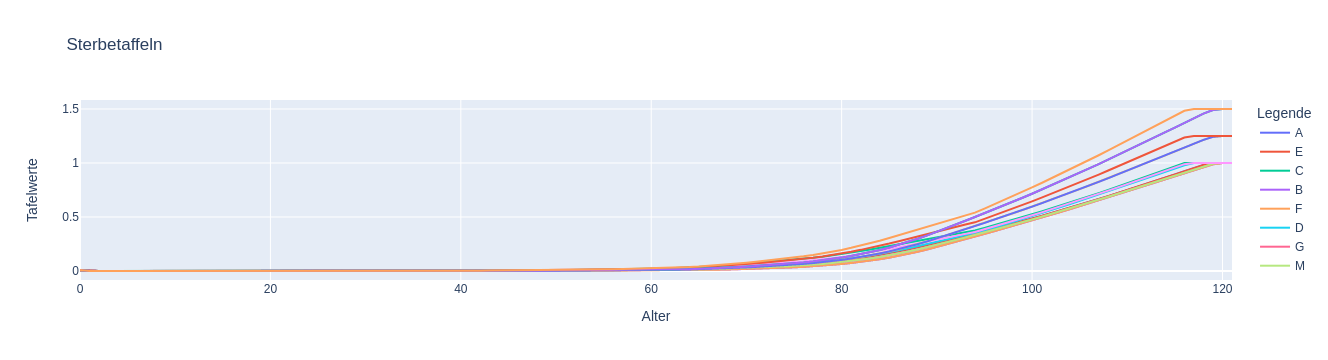

In [18]:
fig = make_subplots(rows = 1, cols = 1)
columns = df_tafel.columns
for i in range(len(df_tafel.columns)):
    trace = go.Scatter(x = df_tafel.index, y = df_tafel[columns[i]], mode = "lines", name = columns[i])
    fig.add_trace(trace)
fig.update_layout(title = "Sterbetaffeln", xaxis_title = "Alter", yaxis_title = "Tafelwerte", legend_title = "Legende")
fig.show()

<AxesSubplot:>

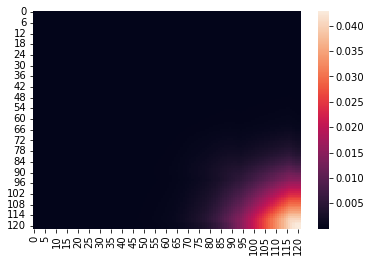

In [24]:
cov_matrix = np.cov(df_tafel)
#cov_matrix
sns.heatmap(cov_matrix)

## Logarithmische Betrachtung

In [27]:
data_log = np.log10(df_tafel)
df_log_tafeln = pd.DataFrame(data = data_log)
df_log_tafeln

,A,E,C,B,F,D,G,M,J,H,N,K,I,O,L
Alter,,,,,,,,,,,,,,,
0,-2.213746,-2.213746,-2.179470,-2.293453,-2.293453,-2.259164,-2.251773,-2.251773,-2.217492,-2.154863,-2.154863,-2.120581,-2.075682,-2.075682,-2.041400
1,-3.373660,-3.373660,-3.339135,-3.412289,-3.412289,-3.377786,-3.392545,-3.392545,-3.358030,-3.295635,-3.295635,-3.261116,-3.216454,-3.216454,-3.181939
2,-3.464706,-3.464706,-3.430626,-3.497573,-3.497573,-3.463442,-3.480829,-3.480829,-3.446724,-3.383913,-3.383913,-3.349809,-3.304737,-3.304737,-3.270633
3,-3.560667,-3.560667,-3.527244,-3.593460,-3.593460,-3.559091,-3.576754,-3.576754,-3.542875,-3.479844,-3.479844,-3.445959,-3.400663,-3.400663,-3.366784
4,-3.657577,-3.657577,-3.623423,-3.694649,-3.694649,-3.659556,-3.675718,-3.675718,-3.641114,-3.578808,-3.578808,-3.544196,-3.499626,-3.499626,-3.465023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,-0.021008,-0.021008,0.000000,-0.030270,-0.030270,0.000000,-0.025614,-0.025614,0.000000,0.071296,0.071296,0.096910,0.150477,0.150477,0.176091
118,-0.007839,-0.007839,0.000000,-0.017616,-0.017616,0.000000,-0.012700,-0.012700,0.000000,0.084210,0.084210,0.096910,0.163391,0.163391,0.176091
119,0.000000,0.000000,0.000000,-0.005435,-0.005435,0.000000,-0.002709,-0.002709,0.000000,0.094201,0.094201,0.096910,0.173382,0.173382,0.176091


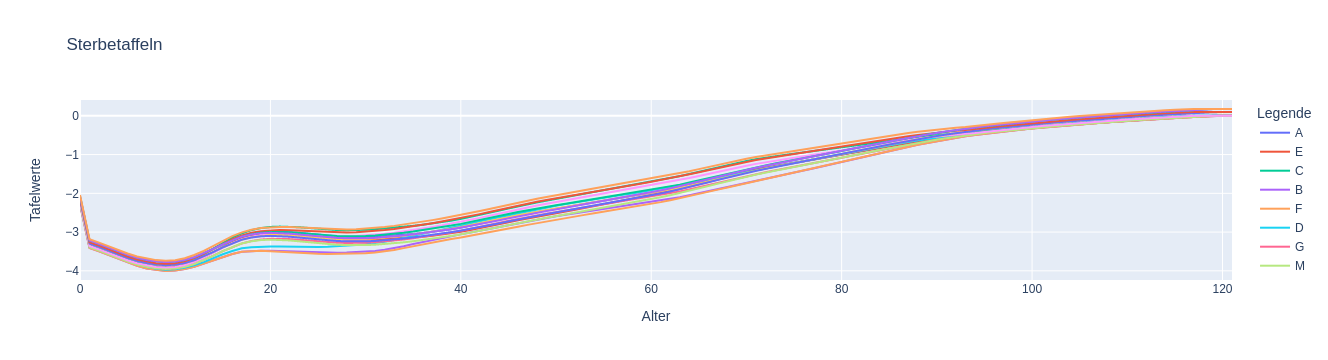

In [28]:
fig = make_subplots(rows = 1, cols = 1)
columns = df_log_tafeln.columns
for i in range(len(df_log_tafeln.columns)):
    trace = go.Scatter(x = df_log_tafeln.index, y = df_log_tafeln[columns[i]], mode = "lines", name = columns[i])
    fig.add_trace(trace)
fig.update_layout(title = "Sterbetaffeln", xaxis_title = "Alter", yaxis_title = "Tafelwerte", legend_title = "Legende")
fig.show()

<AxesSubplot:>

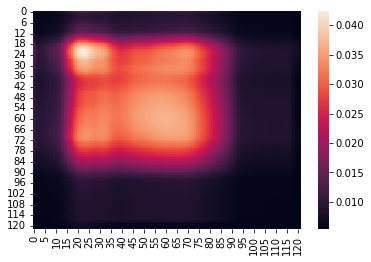

In [36]:
log_cov_matrix = np.cov(df_log_tafeln)
#cov_matrix
sns.heatmap(log_cov_matrix)

## skalierte Betrachtung

In [33]:
def standard_scale(df, mean):
    for column in df.columns:
        std = df[column].std()
        df[column] = (df[column]-mean)/std
    return df    

In [34]:
mean_all_features = df_tafel.stack().mean()
#mean_all_features
df_scaled_tafeln = standard_scale(df_tafel, mean_all_features)
df_scaled_tafeln

,A,E,C,B,F,D,G,M,J,H,N,K,I,O,L
Alter,,,,,,,,,,,,,,,
0,-0.707730,-0.707203,-0.672038,-0.720015,-0.719859,-0.680997,-0.714000,-0.713655,-0.676784,-0.567428,-0.567153,-0.537549,-0.469713,-0.469486,-0.444726
1,-0.726771,-0.726230,-0.691650,-0.735943,-0.735784,-0.697330,-0.731498,-0.731145,-0.694770,-0.584926,-0.584643,-0.555536,-0.487211,-0.486975,-0.462713
2,-0.727039,-0.726497,-0.691927,-0.736177,-0.736017,-0.697571,-0.731749,-0.731395,-0.695029,-0.585177,-0.584894,-0.555795,-0.487462,-0.487226,-0.462972
3,-0.727266,-0.726725,-0.692163,-0.736390,-0.736231,-0.697789,-0.731970,-0.731616,-0.695257,-0.585398,-0.585114,-0.556022,-0.487683,-0.487447,-0.463199
4,-0.727450,-0.726909,-0.692351,-0.736570,-0.736410,-0.697972,-0.732152,-0.731798,-0.695442,-0.585579,-0.585296,-0.556208,-0.487864,-0.487628,-0.463384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2.460252,2.458420,2.492152,2.422775,2.422251,2.512169,2.442197,2.441016,2.503171,2.588770,2.587517,2.642406,2.686484,2.685185,2.735229
118,2.558420,2.556516,2.492152,2.516200,2.515656,2.512169,2.538030,2.536803,2.503171,2.684603,2.683305,2.642406,2.782318,2.780972,2.735229
119,2.618278,2.616329,2.492152,2.608747,2.608182,2.512169,2.614150,2.612885,2.503171,2.760722,2.759387,2.642406,2.858437,2.857055,2.735229


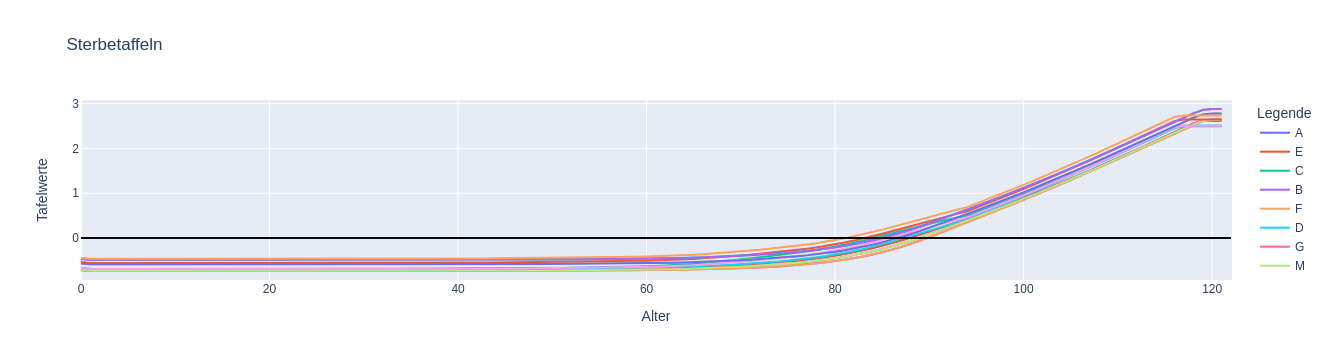

In [52]:
fig = make_subplots(rows = 1, cols = 1)
columns = df_scaled_tafeln.columns
for i in range(len(df_scaled_tafeln.columns)):
    trace = go.Scatter(x = df_scaled_tafeln.index, y = df_scaled_tafeln[columns[i]], mode = "lines", name = columns[i])
    fig.add_trace(trace)
fig.add_shape(type='line', x0=0, y0=0, x1=size, y1=0, line=dict(color='Black'))
fig.update_layout(title = "Sterbetaffeln", xaxis_title = "Alter", yaxis_title = "Tafelwerte", legend_title = "Legende")
fig.show()   

<AxesSubplot:>

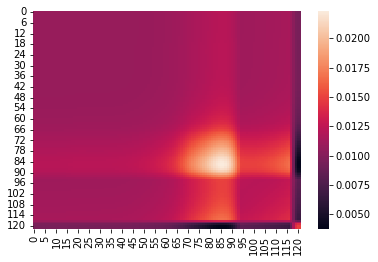

In [37]:
scaled_cov_matrix = np.cov(df_scaled_tafeln)
#cov_matrix
sns.heatmap(scaled_cov_matrix)

## CDF

In [46]:
feature_names = df_tafel.columns
data_cdf = norm.cdf(df_tafel)
df_cdf = pd.DataFrame(data= data_cdf, columns = feature_names)
df_cdf

,A,E,C,B,F,D,G,M,J,H,N,K,I,O,L
0,0.239557,0.239720,0.250780,0.235758,0.235806,0.247937,0.237613,0.237720,0.249272,0.285212,0.285305,0.295444,0.319280,0.319361,0.328259
1,0.233683,0.233849,0.244579,0.230883,0.230931,0.242798,0.232237,0.232345,0.243600,0.279299,0.279394,0.289264,0.313054,0.313138,0.321785
2,0.233601,0.233767,0.244492,0.230812,0.230860,0.242723,0.232161,0.232269,0.243518,0.279214,0.279310,0.289176,0.312966,0.313049,0.321692
3,0.233531,0.233697,0.244418,0.230747,0.230795,0.242654,0.232093,0.232201,0.243447,0.279140,0.279235,0.289098,0.312887,0.312971,0.321611
4,0.233475,0.233641,0.244359,0.230692,0.230741,0.242597,0.232038,0.232146,0.243389,0.279079,0.279174,0.289034,0.312823,0.312907,0.321544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,0.993058,0.993023,0.993651,0.992299,0.992288,0.994000,0.992701,0.992677,0.993846,0.995184,0.995166,0.995884,0.996390,0.996376,0.996883
118,0.994743,0.994714,0.993651,0.994069,0.994059,0.994000,0.994426,0.994407,0.993846,0.996369,0.996355,0.995884,0.997301,0.997290,0.996883
119,0.995581,0.995556,0.993651,0.995456,0.995449,0.994000,0.995528,0.995511,0.993846,0.997116,0.997105,0.995884,0.997871,0.997862,0.996883
120,0.995581,0.995556,0.993651,0.995986,0.995979,0.994000,0.995794,0.995778,0.993846,0.997296,0.997285,0.995884,0.998008,0.997999,0.996883


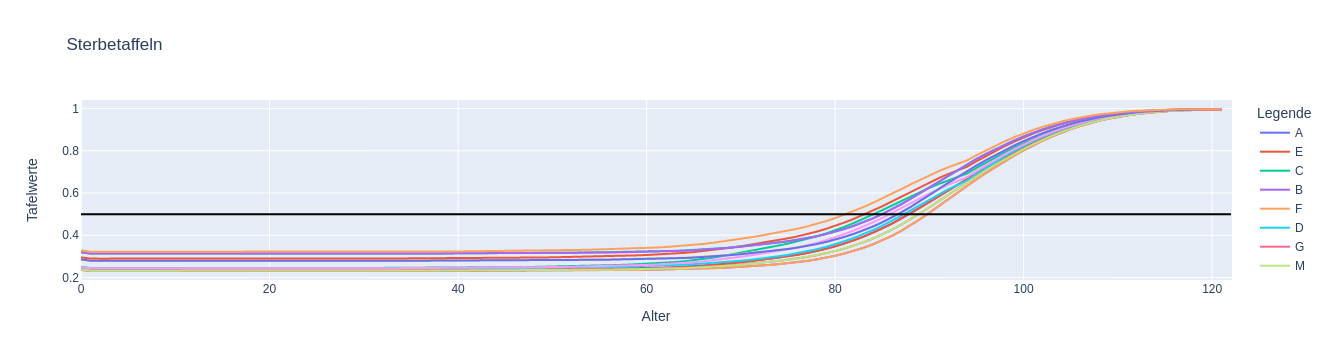

In [51]:
size = len(df_cdf)
fig = make_subplots(rows = 1, cols = 1)
columns = df_cdf.columns
for i in range(len(df_cdf.columns)):
    trace = go.Scatter(x = df_cdf.index, y = df_cdf[columns[i]], mode = "lines", name = columns[i])
    fig.add_trace(trace)
fig.add_shape(type='line', x0=0, y0=0.5, x1=size, y1=0.5, line=dict(color='Black'))
fig.update_layout(title = "Sterbetaffeln", xaxis_title = "Alter", yaxis_title = "Tafelwerte", legend_title = "Legende")
fig.show() 